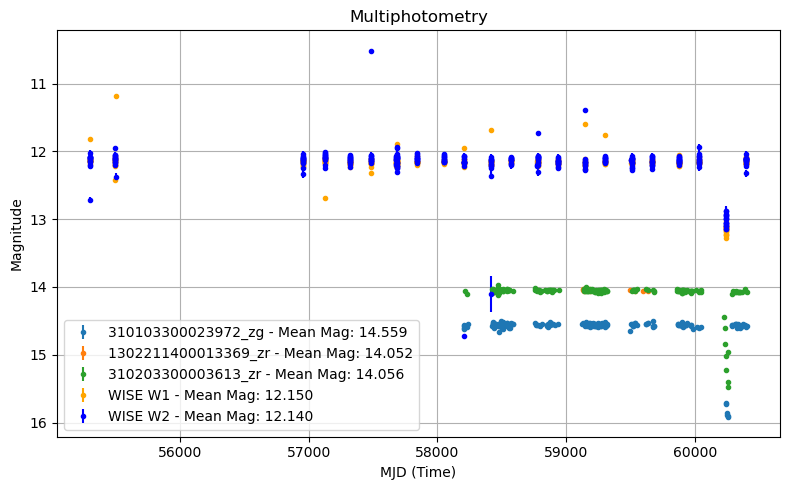

In [17]:
#WISE vs. ZTF
#ZTF does not provide flux so normalization is not optimal with it...

import os
import pandas as pd
import matplotlib.pyplot as plt

# ZTF data:
light_curve_files = [
    "data/light_curve_310103300023972.csv",
    "data/light_curve_1302211400013369.csv",
    "data/light_curve_310203300003613.csv"
]

# WISE data:
wise_file_path = "data/J073234.11-200048.87_full_data.csv"

plt.figure(figsize=(8, 5))

# Plot ZTF: 
for file in light_curve_files:
    light_curve = pd.read_csv(file)
    
    # Calculate means before mjd 60000
    mean_mag = light_curve[light_curve['mjd'] < 60000]['mag'].mean()
    
    # indetify filter
    filter_code = light_curve['filtercode'].iloc[0] 
    
    # get shorter name of file
    base_name = os.path.basename(file).replace("light_curve_", "").split('.')[0]
    
    # Plot light curve
    plt.errorbar(light_curve['mjd'], light_curve['mag'], yerr=light_curve.get('magerr'), fmt='.',
                 label=f"{base_name}_{filter_code} - Mean Mag: {mean_mag:.3f}")

# Load WISE
wise_light_curve = pd.read_csv(wise_file_path)

# Filter WISE
filtered_wise = wise_light_curve[
    (wise_light_curve['sso_flg'] == 0) & 
    (wise_light_curve['qual_frame'] != 0) & 
    (wise_light_curve['qi_fact'] > 0) & 
    (wise_light_curve['moon_masked'] == 0)
]

# Calculate mean <60000
mean_w1 = filtered_wise[filtered_wise['mjd'] < 60000]['w1mpro'].mean()
mean_w2 = filtered_wise[filtered_wise['mjd'] < 60000]['w2mpro'].mean()

# Plot the WISE light curve
plt.errorbar(filtered_wise['mjd'], filtered_wise['w1mpro'], yerr=filtered_wise['w1sigmpro'], fmt='.', color='orange',
             label=f"WISE W1 - Mean Mag: {mean_w1:.3f}")
plt.errorbar(filtered_wise['mjd'], filtered_wise['w2mpro'], yerr=filtered_wise['w2sigmpro'], fmt='.', color='blue',
             label=f"WISE W2 - Mean Mag: {mean_w2:.3f}")

plt.gca().invert_yaxis()  
plt.xlabel("MJD (Time)")
plt.ylabel("Magnitude")
plt.title("Multiphotometry")
plt.legend(loc="lower left")  
plt.grid(True)
plt.tight_layout()
plt.savefig("ZTF_WISE_photometry.png")
plt.show()


C:\Users\arttu\AppData\Local\Temp\ipykernel_18128\3423420144.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wise_data['normalized_w1flux'] = wise_data['w1flux'] / mean_w1_flux
C:\Users\arttu\AppData\Local\Temp\ipykernel_18128\3423420144.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wise_data['normalized_w2flux'] = wise_data['w2flux'] / mean_w2_flux
C:\Users\arttu\AppData\Local\Temp\ipykernel_18128\3423420144.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

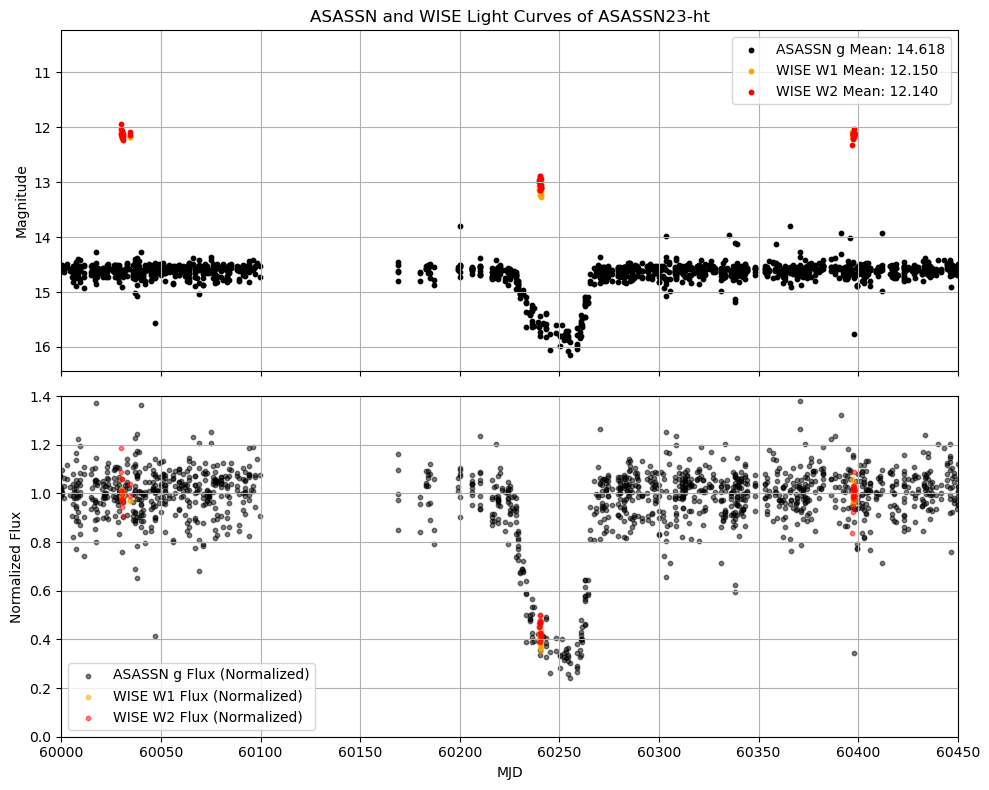

In [18]:
#WISE vs ASASSN
import pandas as pd
import matplotlib.pyplot as plt

wise_file_path = "data/J073234.11-200048.87_full_data.csv"
wise_data = pd.read_csv(wise_file_path)
wise_data = wise_light_curve[
    (wise_light_curve['sso_flg'] == 0) & 
    (wise_light_curve['qual_frame'] != 0) & 
    (wise_light_curve['qi_fact'] > 0) & 
    (wise_light_curve['moon_masked'] == 0)
]

# ASASSN data
asassn_file = "data/ASASSN_LC.csv"
asassn_data = pd.read_csv(asassn_file)


# Filter
asassn_data = asassn_data[asassn_data['mag_err'] != 99.990]

# Remove '>' markers and convert to float
asassn_data['mag'] = asassn_data['mag'].astype(str).str.replace('>', '').astype(float)

# HJD to MJD
asassn_data['MJD'] = asassn_data['HJD'] - 2400000.5

# Focus on g
df_g = asassn_data[asassn_data['Filter'] == 'g']

# Calculate means <MJD 60000
mean_w1_mag = wise_data[wise_data['mjd'] < 60000]['w1mpro'].mean()
mean_w2_mag = wise_data[wise_data['mjd'] < 60000]['w2mpro'].mean()
mean_g_mag = df_g[df_g['MJD'] < 60000]['mag'].mean()

mean_w1_flux = wise_data[wise_data['mjd'] < 60000]['w1flux'].mean()
mean_w2_flux = wise_data[wise_data['mjd'] < 60000]['w2flux'].mean()
mean_g_flux = df_g[df_g['MJD'] < 60000]['flux(mJy)'].mean()

# Normalize flux
wise_data['normalized_w1flux'] = wise_data['w1flux'] / mean_w1_flux
wise_data['normalized_w2flux'] = wise_data['w2flux'] / mean_w2_flux
df_g['normalized_flux'] = df_g['flux(mJy)'] / mean_g_flux

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Upper panel: ASASSN and WISE data (mag)
ax1.scatter(df_g['MJD'], df_g['mag'], color='k', label=f'ASASSN g Mean: {mean_g_mag:.3f}', s=10)
ax1.scatter(wise_data['mjd'], wise_data['w1mpro'], color='orange', label=f'WISE W1 Mean: {mean_w1_mag:.3f}', s=10)
ax1.scatter(wise_data['mjd'], wise_data['w2mpro'], color='red', label=f'WISE W2 Mean: {mean_w2_mag:.3f}', s=10)

ax1.set_ylabel('Magnitude')
ax1.invert_yaxis()  
ax1.legend()
ax1.grid(True)
ax1.set_title('ASASSN and WISE Light Curves of ASASSN23-ht')

# Lower panel: normalized flx
#ax2.scatter(df_v['MJD'], df_v['normalized_flux'], color='blue', label='ASASSN V Flux (Normalized)',alpha= 0.5, s=10)
ax2.scatter(df_g['MJD'], df_g['normalized_flux'], color='k', label='ASASSN g Flux (Normalized)',alpha= 0.5, s=10)
ax2.scatter(wise_data['mjd'], wise_data['normalized_w1flux'], color='orange', label='WISE W1 Flux (Normalized)',alpha= 0.5, s=10)
ax2.scatter(wise_data['mjd'], wise_data['normalized_w2flux'], color='red', label='WISE W2 Flux (Normalized)',alpha= 0.5, s=10)

ax2.set_xlabel('MJD')
ax2.set_ylabel('Normalized Flux')
ax2.set_ylim(0, 1.4)  
ax2.set_xlim(60000, 60450)  

ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.savefig("ASASSN_WISE_photometry.png")

plt.show()



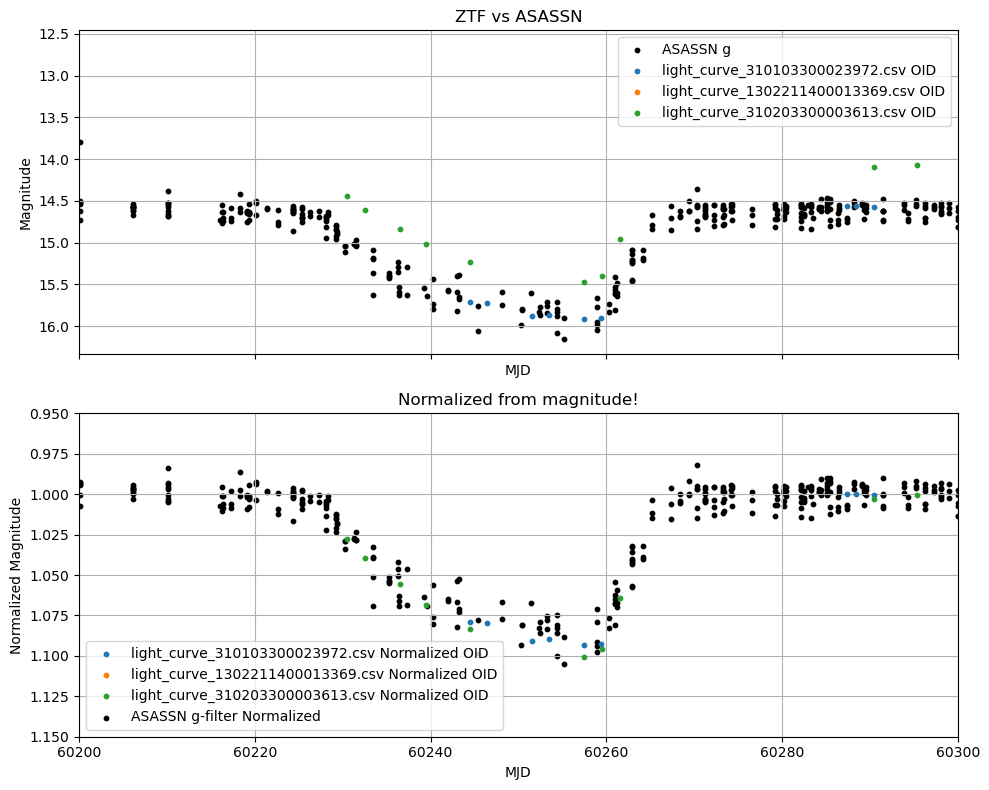

In [20]:
# ZTF data:
light_curve_files = [
    "data/light_curve_310103300023972.csv",
    "data/light_curve_1302211400013369.csv",
    "data/light_curve_310203300003613.csv"
]

# ASASSN data
asassn_file = "data/ASASSN_LC.csv"
asassn_data = pd.read_csv(asassn_file)

# Filter:
asassn_data = asassn_data[asassn_data['mag_err'] != 99.990]

# Remove markers and convert to float
asassn_data['mag'] = asassn_data['mag'].astype(str).str.replace('>', '').astype(float)

#HJD to MJD
asassn_data['MJD'] = asassn_data['HJD'] - 2400000.5

# Focus to g
df_g = asassn_data[asassn_data['Filter'] == 'g']

# Calculate mean
mean_g_mag = df_g[df_g['MJD'] < 60000]['mag'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot ASASSN g
ax1.scatter(df_g['MJD'], df_g['mag'], color='k', label="ASASSN g", s=10, zorder=1)

# Plot ZTF
for file in light_curve_files:
    light_curve = pd.read_csv(file)
    ax1.scatter(light_curve['mjd'], light_curve['mag'], s=10, label=f"{os.path.basename(file)} OID", zorder=2)

ax1.invert_yaxis()  
ax1.set_xlabel("MJD")
ax1.set_ylabel("Magnitude")
ax1.set_title("ZTF vs ASASSN")
ax1.legend()
ax1.grid(True)

# Plot normalized light curves
for file in light_curve_files:
    light_curve = pd.read_csv(file)
    
    # Normalize
    mean_oid_mag = light_curve[light_curve['mjd'] < 60000]['mag'].mean() 
    normalized_oid_mag = light_curve['mag'] / mean_oid_mag  
    
    ax2.scatter(light_curve['mjd'], normalized_oid_mag, s=10, label=f"{os.path.basename(file)} Normalized OID", zorder=2)

# Normalize the ASASSN
normalized_asassn_g_mag = df_g['mag'] / mean_g_mag 

ax2.scatter(df_g['MJD'], normalized_asassn_g_mag, color='k', label="ASASSN g-filter Normalized", s=10, zorder=1)

ax2.invert_yaxis()
ax2.set_xlabel("MJD")
ax2.set_ylabel("Normalized Magnitude")
ax2.set_title("Normalized from magnitude!")
ax2.legend()
ax2.set_xlim(60200, 60300)
ax2.set_ylim(1.15,0.95)

ax2.grid(True)
plt.savefig("ZTF_ASASSN_photometry.png")

plt.tight_layout()
plt.show()



C:\Users\arttu\AppData\Local\Temp\ipykernel_18128\2539329538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['mjd_bin'] = np.digitize(df_g['MJD'], bin_edges)


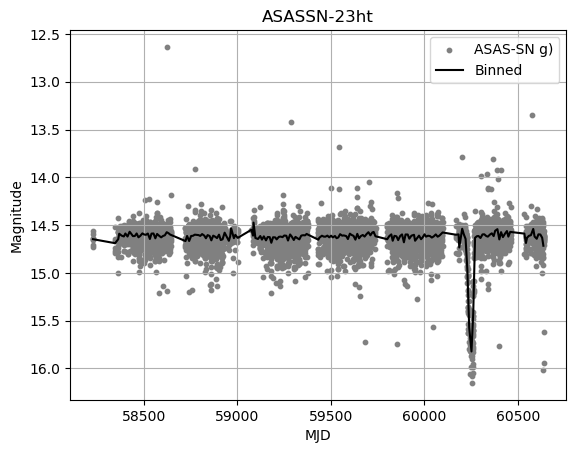

In [21]:
import numpy as np

bin_size_minutes = 14400  # Set bi size mins
bin_size_mjd = bin_size_minutes / 1440.0  # Convert minutes to MJD

mjd_min, mjd_max = df_g['MJD'].min(), df_g['MJD'].max()
bin_edges = np.arange(mjd_min, mjd_max, bin_size_mjd)

df_g['mjd_bin'] = np.digitize(df_g['MJD'], bin_edges)

binned_data = (
    df_g.groupby('mjd_bin')
    .agg(
        mjd_bin_center=('MJD', 'mean'),
        mag_bin=('mag', 'mean'),
        magerr_bin=('mag_err', 'mean')
    )
    .reset_index()
)

plt.scatter(df_g['MJD'], df_g['mag'], c='gray', label='ASAS-SN g)', s=10)
plt.plot(binned_data['mjd_bin_center'], binned_data['mag_bin'], color='k', label='Binned', lw=1.5)

plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis() 
plt.title('ASASSN-23ht')
plt.legend()
plt.grid()
plt.savefig("binned_ASSASN_photometry.png")

plt.show()
